In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
with open("messages.json", 'r', encoding='utf-8') as file:
    data = json.load(file)
data = [message for message in data if message['author']['avatarUrl'] not in [None, "None"]]


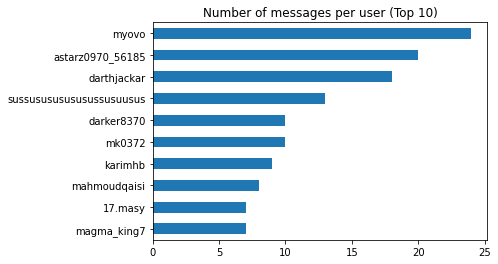

In [3]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

authors = [get_display(arabic_reshaper.reshape(msg['author']['nickname'])) for msg in data]
msg_count = pd.Series(authors).value_counts()

top_10_msg_count = msg_count.sort_values(ascending=False).head(10)

top_10_msg_count.sort_values().plot(kind='barh', title="Number of messages per user (Top 10)")
plt.show()

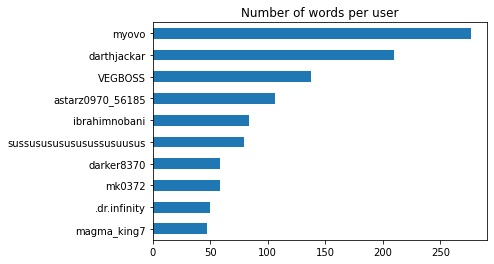

In [4]:
author_word_count = {}
for msg in data:
    author = get_display(arabic_reshaper.reshape(msg['author']['nickname']))
    words = len(msg['content'].split())
    author_word_count[author] = author_word_count.get(author, 0) + words

word_count_series = pd.Series(author_word_count).sort_values(ascending=False).head(10)
word_count_series.sort_values().plot(kind='barh', title="Number of words per user")
plt.show()


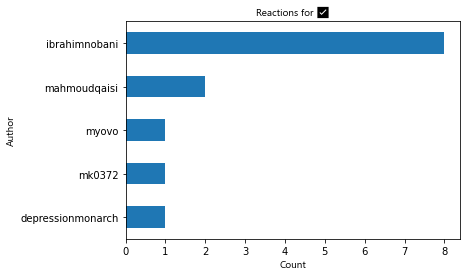

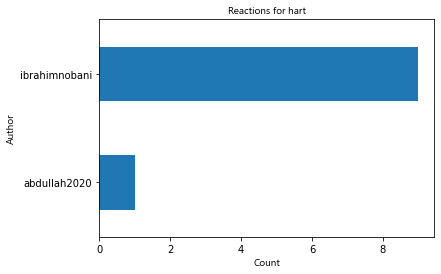

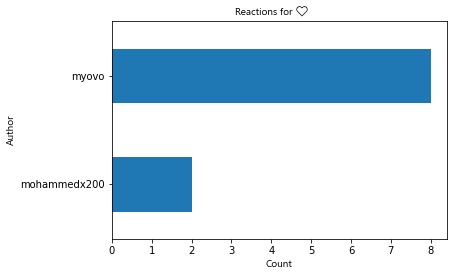

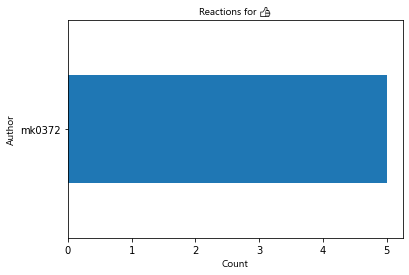

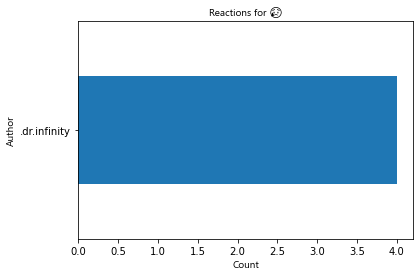

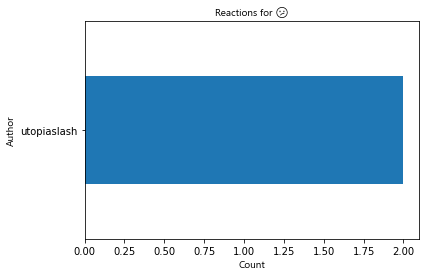

C:\Users\Watani Mall\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129761 (\U0001fae1) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


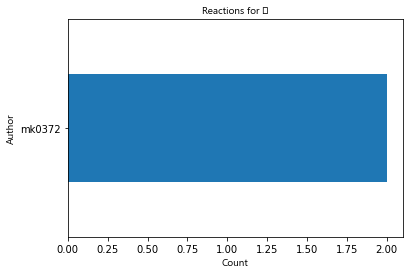

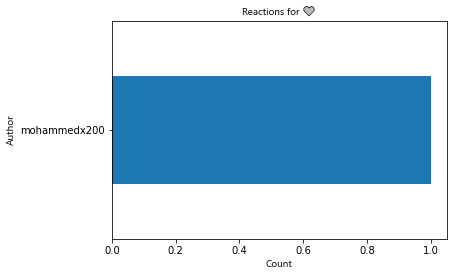

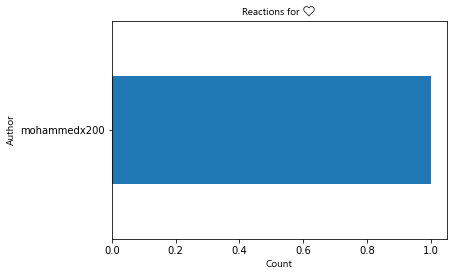

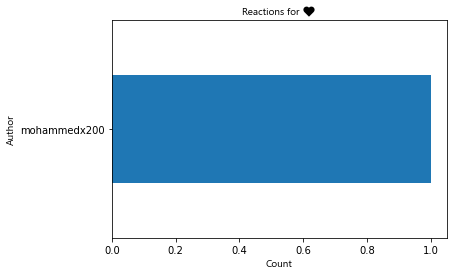

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

prop = fm.FontProperties(fname='C:\\Windows\\Fonts\\seguiemj.ttf') 
author_reaction_count = {}

for msg in data:
    author = msg['author']['nickname']
    
    if len(msg['reactions']) > 0:
        for reaction in msg['reactions']:
            emoji_name = reaction['emoji']['name']  
            count = reaction['count']
            
            if not emoji_name:  # Skip if emoji name is missing
                continue
                
            if author not in author_reaction_count:
                author_reaction_count[author] = {}
                
            if emoji_name not in author_reaction_count[author]:
                author_reaction_count[author][emoji_name] = 0
                
            author_reaction_count[author][emoji_name] += count

idx = pd.MultiIndex.from_tuples([(a, e) for a in author_reaction_count for e in author_reaction_count[a]])
s = pd.Series([author_reaction_count[a][e] for a, e in idx], index=idx)


total_emoji_count = {}
for author in author_reaction_count:
    for emoji, count in author_reaction_count[author].items():
        total_emoji_count[emoji] = total_emoji_count.get(emoji, 0) + count

sorted_emojis = sorted(total_emoji_count, key=total_emoji_count.get, reverse=True)

idx = pd.MultiIndex.from_tuples([(a, e) for a in author_reaction_count for e in author_reaction_count[a]])
s = pd.Series([author_reaction_count[a][e] for a, e in idx], index=idx)

for emoji in sorted_emojis:
    ax = s.xs(emoji, level=1).sort_values().head(10).plot(kind='barh', title=f"Reactions for {emoji}")

    ax.set_title(f"Reactions for {emoji}", fontproperties=prop)
    ax.set_xlabel("Count", fontproperties=prop)
    ax.set_ylabel("Author", fontproperties=prop)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    plt.show()


In [7]:
funny_emojis = ['😂', '🤣']

msg_reactions = {}
for msg in data:
    if 'reactions' in msg:
        funny_reaction_count = sum([reaction['count'] for reaction in msg['reactions'] if reaction['emoji']['name'] in funny_emojis])
        if funny_reaction_count > 0:
            msg_reactions[msg['content']] = funny_reaction_count

top_10_msg = pd.Series(msg_reactions).nlargest(10)

top_10_msg


<ipython-input-7-238d101f561c>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  top_10_msg = pd.Series(msg_reactions).nlargest(10)


Series([], dtype: float64)

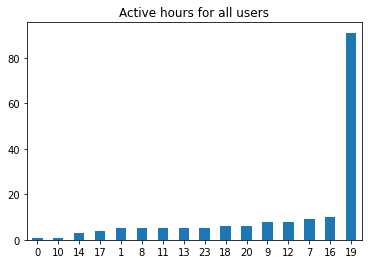

In [8]:
hours = [pd.to_datetime(msg['timestamp']).hour for msg in data]
hour_series = pd.Series(hours).value_counts()

hour_series.sort_values().plot(kind='bar', title="Active hours for all users")
plt.xticks(rotation=0)
plt.show()


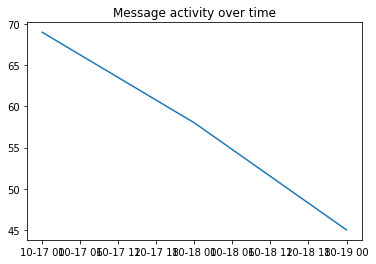

In [9]:
dates = [pd.to_datetime(msg['timestamp']).date() for msg in data]
date_series = pd.Series(dates).value_counts()

date_series.sort_index().plot(kind='line', title="Message activity over time")
plt.show()


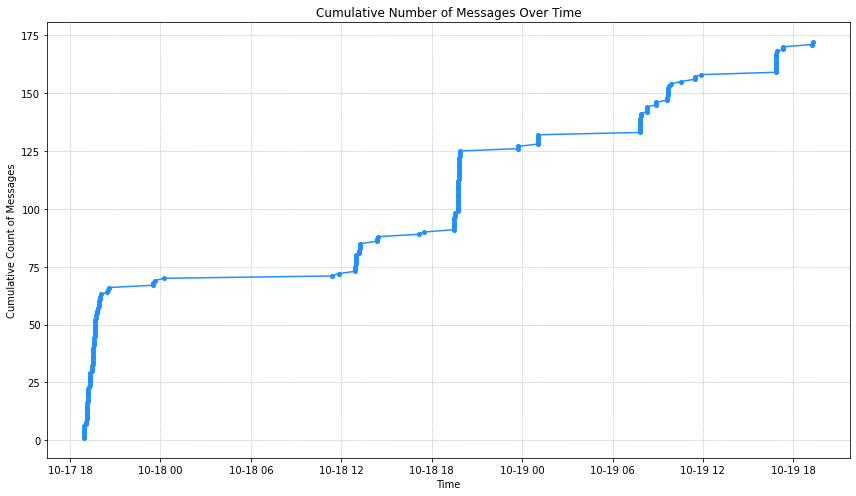

In [10]:
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df['cumulative_count'] = pd.Series([1]*len(df)).cumsum()
plt.figure(figsize=(12, 7))
plt.plot(df['timestamp'], df['cumulative_count'], color='dodgerblue', marker='o', linestyle='-', markersize=4)
plt.title('Cumulative Number of Messages Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Count of Messages')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


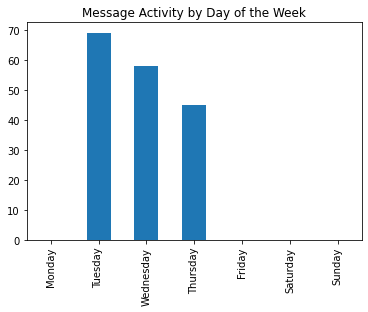

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'],  utc=True)

df['day_of_week'] = df['timestamp'].dt.day_name()
day_activity = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_activity.plot(kind='bar', title='Message Activity by Day of the Week')
plt.show()


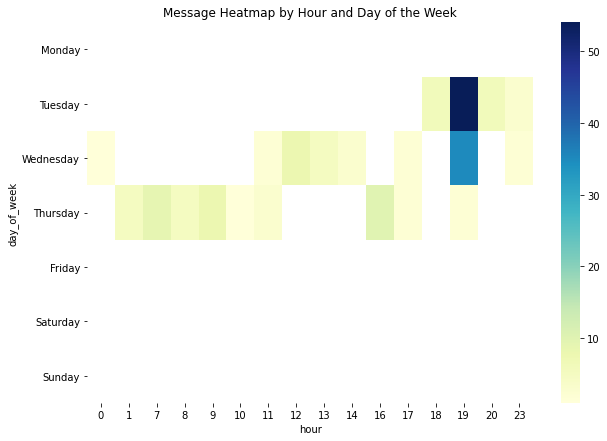

In [12]:
import seaborn as sns
df['hour'] = df['timestamp'].dt.hour
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Message Heatmap by Hour and Day of the Week')
plt.show()


In [13]:
from collections import defaultdict

emoji_counts = defaultdict(int)

for msg in data:
    if 'reactions' in msg:
        for reaction in msg['reactions']:
            emoji_name = reaction['emoji']['name']
            emoji_counts[emoji_name] += reaction['count']

sorted_emoji_counts = dict(sorted(emoji_counts.items(), key=lambda item: item[1], reverse=True))


C:\Users\Watani Mall\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 129761 (\U0001fae1) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


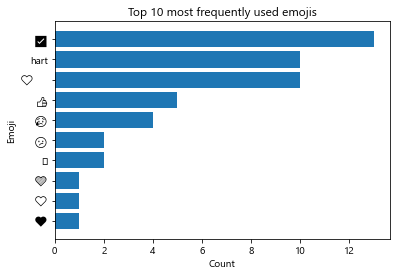

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

prop = fm.FontProperties(fname='C:\\Windows\\Fonts\\seguiemj.ttf') 
plt.rcParams['font.family'] = 'Segoe UI Emoji'

top_emojis = list(sorted_emoji_counts.keys())[:10]
top_emoji_counts = [sorted_emoji_counts[emoji] for emoji in top_emojis]

plt.barh(top_emojis, top_emoji_counts)
plt.xlabel('Count')
plt.ylabel('Emoji')
plt.title('Top 10 most frequently used emojis')
plt.gca().invert_yaxis()
plt.show()

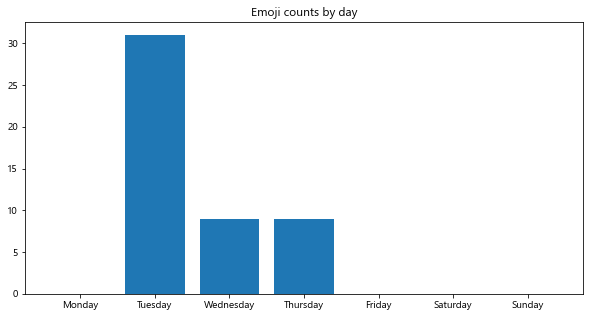

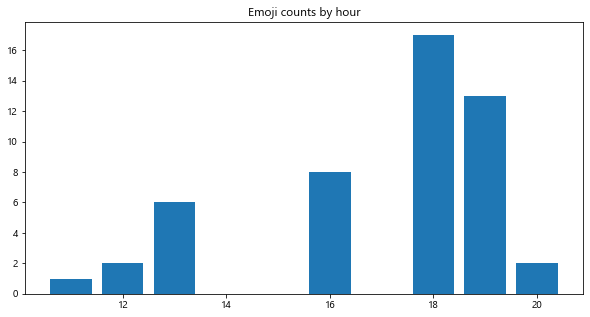

In [15]:
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

emoji_day_counts = defaultdict(int)
emoji_hour_counts = defaultdict(int)

for _, row in df.iterrows():
    if 'reactions' in row:
        for reaction in row['reactions']:
            emoji_name = reaction['emoji']['name']
            emoji_day_counts[row['day']] += reaction['count']
            emoji_hour_counts[row['hour']] += reaction['count']

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
emoji_day_counts = {k: emoji_day_counts[k] for k in days_order}

plt.figure(figsize=(10, 5))
plt.bar(emoji_day_counts.keys(), emoji_day_counts.values())
plt.title('Emoji counts by day')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(emoji_hour_counts.keys(), emoji_hour_counts.values())
plt.title('Emoji counts by hour')
plt.show()


In [16]:
import nltk
from nltk import ngrams
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import re

def is_emoji(s):
    return s and any(char not in set('\x00\x0f\x7f\xa0') and (not char.isascii() or char.isdecimal()) for char in s)

usernames = {item for msg in data for item in msg['author']['nickname'].split()}

nltk.download('stopwords')

all_text = ' '.join(df['content'].fillna(''))

tokens = nltk.word_tokenize(all_text)

stop_words = set(stopwords.words('english'))

regex = re.compile(r'[@_!#$%^&*()<>?/\|}{~:\[\],\']')


tokens = [
    word for word in tokens 
    if word.lower() not in stop_words 
    and not is_emoji(word) 
    and not word.startswith('@') 
    and word not in usernames
    and regex.search(word) == None
]

bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

print("Top 10 Bigrams:")
print(pd.Series(bigram_counts).nlargest(10))

print("\nTop 10 Trigrams:")
print(pd.Series(trigram_counts).nlargest(10))


Top 10 Bigrams:
https              https                      8
GG                 advanced                   5
advanced           level                      5
account            number                     4
.                  .                          3
https              igshid=MzRlODBiNWFlZA==    3
.                  https                      3
everyone           .                          2
PalestineGenocide  everyone                   2
https              GG                         2
dtype: int64

Top 10 Trigrams:
GG        advanced  level                      5
https     https     https                      5
                    igshid=MzRlODBiNWFlZA==    2
          GG        advanced                   2
Bank      account   number                     2
.         .         .                          1
                    everyone                   1
          everyone  .                          1
everyone  .         Editors                    1
.         Editors   https       

[nltk_data] Downloading package stopwords to C:\Users\Watani
[nltk_data]     Mall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


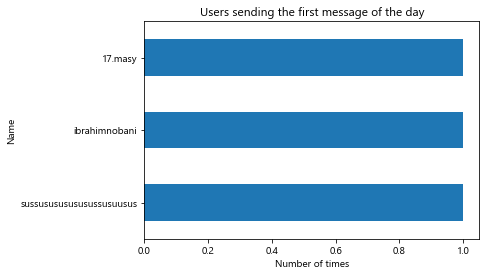

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

df['name'] = df['author'].apply(lambda x: x.get('nickname', 'Unknown'))


first_msg_each_day = df.groupby('date').first().reset_index()

first_msg_each_day['name'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', title='Users sending the first message of the day')
plt.xlabel('Number of times')
plt.ylabel('Name')
plt.show()

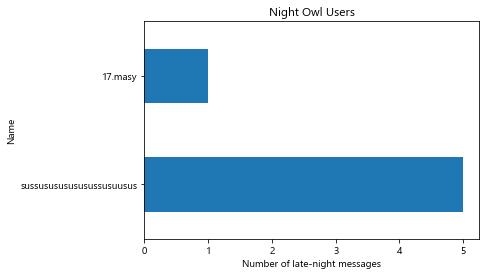

In [18]:
night_owl_msgs = df[(df['time'] >= pd.to_datetime('00:00:00').time()) & (df['time'] <= pd.to_datetime('04:00:00').time())]

if len(night_owl_msgs):
    night_owl_msgs['name'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', title='Night Owl Users')
    plt.xlabel('Number of late-night messages')
    plt.ylabel('Name')
    plt.show()

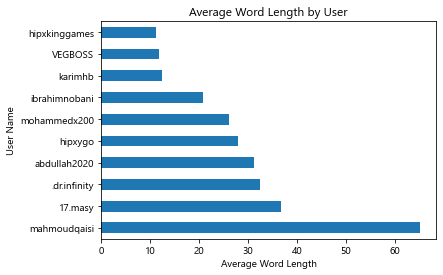

In [19]:
def avg_word_length(text):
    words = text.split()
    if not words:
        return 0
    return sum(len(word) for word in words) / len(words)

df['avg_word_length'] = df['content'].apply(avg_word_length)

user_avg_word_lengths = df.groupby('name')['avg_word_length'].mean().sort_values(ascending=False)

user_avg_word_lengths.sort_values(ascending=False).head(10).plot(kind='barh', title='Average Word Length by User')
plt.xlabel('Average Word Length')
plt.ylabel('User Name')
plt.show()

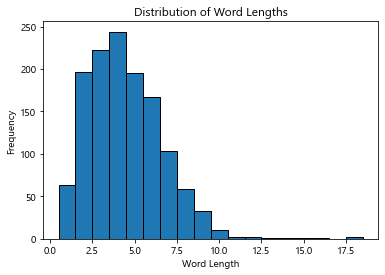

In [20]:
all_word_lengths = [len(word) for msg in df['content'].dropna() for word in msg.split()]
plt.hist(all_word_lengths, bins=range(1, 20), edgecolor='black', align='left')
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

In [21]:
mentions = []

for msg in data:
    author = msg['author']['nickname']
    
    if 'mentions' in msg:
        for mentioned in msg['mentions']:
            mentioned_name = mentioned['nickname'] if mentioned['nickname'] else mentioned['name']
            mentions.append({'mentioning_user': author, 'mentioned_user': mentioned_name})

mentions_df = pd.DataFrame(mentions)

mentioned_most = mentions_df['mentioned_user'].value_counts().idxmax()
print(f"{mentioned_most} is mentioned the most.")

mentions_others_most = mentions_df['mentioning_user'].value_counts().idxmax()
print(f"{mentions_others_most} mentions others the most.")


darthjackar is mentioned the most.
magma_king7 mentions others the most.


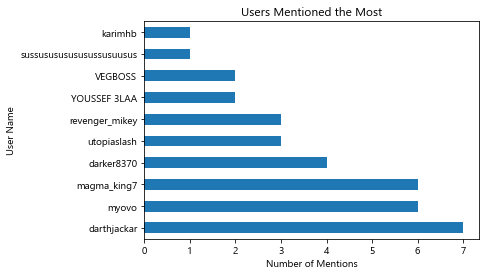

In [22]:
mentions_df['mentioned_user'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', title='Users Mentioned the Most')
plt.xlabel('Number of Mentions')
plt.ylabel('User Name')
plt.show()

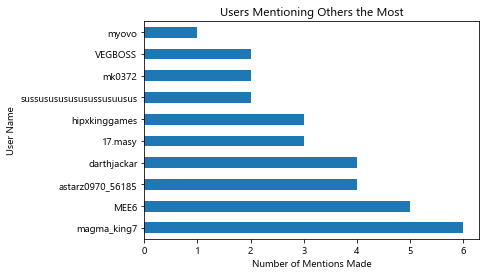

In [23]:
mentions_df['mentioning_user'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', title='Users Mentioning Others the Most')
plt.xlabel('Number of Mentions Made')
plt.ylabel('User Name')
plt.show()

In [24]:
question_count = 0
statement_count = 0

user_questions = {}

for msg in data:
    author = msg['author']['nickname']
    
    if msg['content'].strip().endswith('?'):
        question_count += 1
        
        if author not in user_questions:
            user_questions[author] = 0
        user_questions[author] += 1
    else:
        statement_count += 1

most_questions_user = max(user_questions, key=user_questions.get)
most_questions_count = user_questions[most_questions_user]

print(f"Total Questions: {question_count}")
print(f"Total Statements: {statement_count}")
print(f"{most_questions_user} asks the most questions with a total of {most_questions_count} questions.")


ValueError: max() arg is an empty sequence

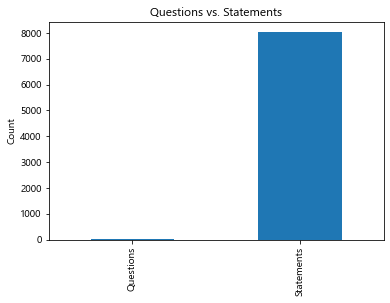

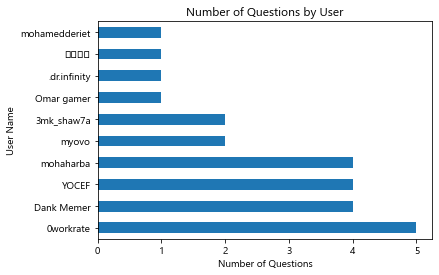

In [67]:

df = pd.DataFrame([question_count, statement_count], index=['Questions', 'Statements'])
df.plot(kind='bar', legend=False, title='Questions vs. Statements')
plt.ylabel('Count')
plt.show()

user_question_series = pd.Series(user_questions)
user_question_series.sort_values().sort_values(ascending=False).head(10).plot(kind='barh', title='Number of Questions by User')
plt.xlabel('Number of Questions')
plt.ylabel('User Name')
plt.show()

 sends the shortest messages on average with an average length of 15.57 characters.
None sends the longest messages on average with an average length of 21.20 characters.


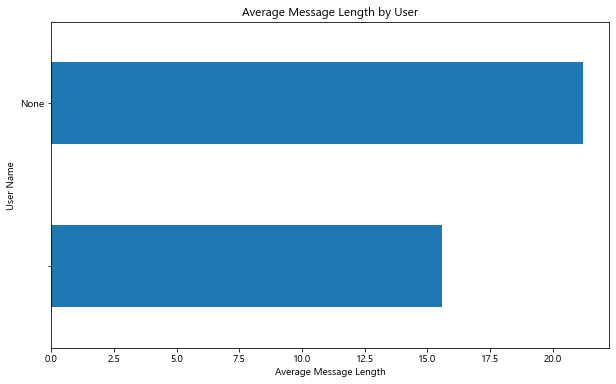

In [68]:
import pandas as pd

cumulative_lengths = {}
message_counts = {}

for msg in data:
    author = msg['author']['name']
    msg_length = len(msg['content'])
    
    cumulative_lengths[author] = cumulative_lengths.get(author, 0) + msg_length
    message_counts[author] = message_counts.get(author, 0) + 1

average_lengths = {author: cumulative_lengths[author]/message_counts[author] for author in cumulative_lengths}

shortest_avg_user = min(average_lengths, key=average_lengths.get)
longest_avg_user = max(average_lengths, key=average_lengths.get)

print(f"{shortest_avg_user} sends the shortest messages on average with an average length of {average_lengths[shortest_avg_user]:.2f} characters.")
print(f"{longest_avg_user} sends the longest messages on average with an average length of {average_lengths[longest_avg_user]:.2f} characters.")


avg_length_series = pd.Series(average_lengths)
avg_length_series.sort_values().plot(kind='barh', figsize=(10,6), title='Average Message Length by User')
plt.xlabel('Average Message Length')
plt.ylabel('User Name')
plt.show()


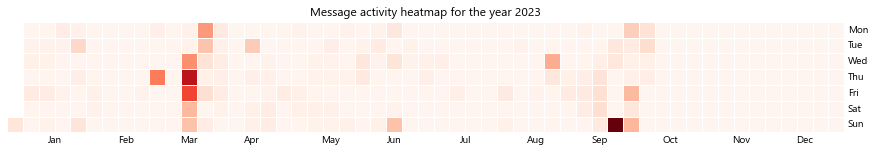

In [69]:
import calmap

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

by_day = df.groupby(df['timestamp'].dt.date).size()

all_days_2023 = pd.date_range(start="2023-01-01", end="2023-12-31", freq='D')
by_day = by_day.reindex(all_days_2023, fill_value=0)

plt.figure(figsize=(15, 4))
calmap.yearplot(by_day, year=2023)
plt.title("Message activity heatmap for the year 2023")
plt.show()


In [25]:
import networkx as nx
import matplotlib.pyplot as plt

import requests
from PIL import Image
import matplotlib.pyplot as plt
import networkx as nx

df = pd.DataFrame(data)
users = df['author'].to_list()

users = list({v['id']:v for v in users}.values())

avatar_images = {}
for user in users:
    response = requests.get(user['avatarUrl'], stream=True)
    response.raise_for_status()
    image = Image.open(response.raw)
    resized_image = image.resize((50, 50))
    avatar_images[user['name']] = resized_image
    

KeyError: ''

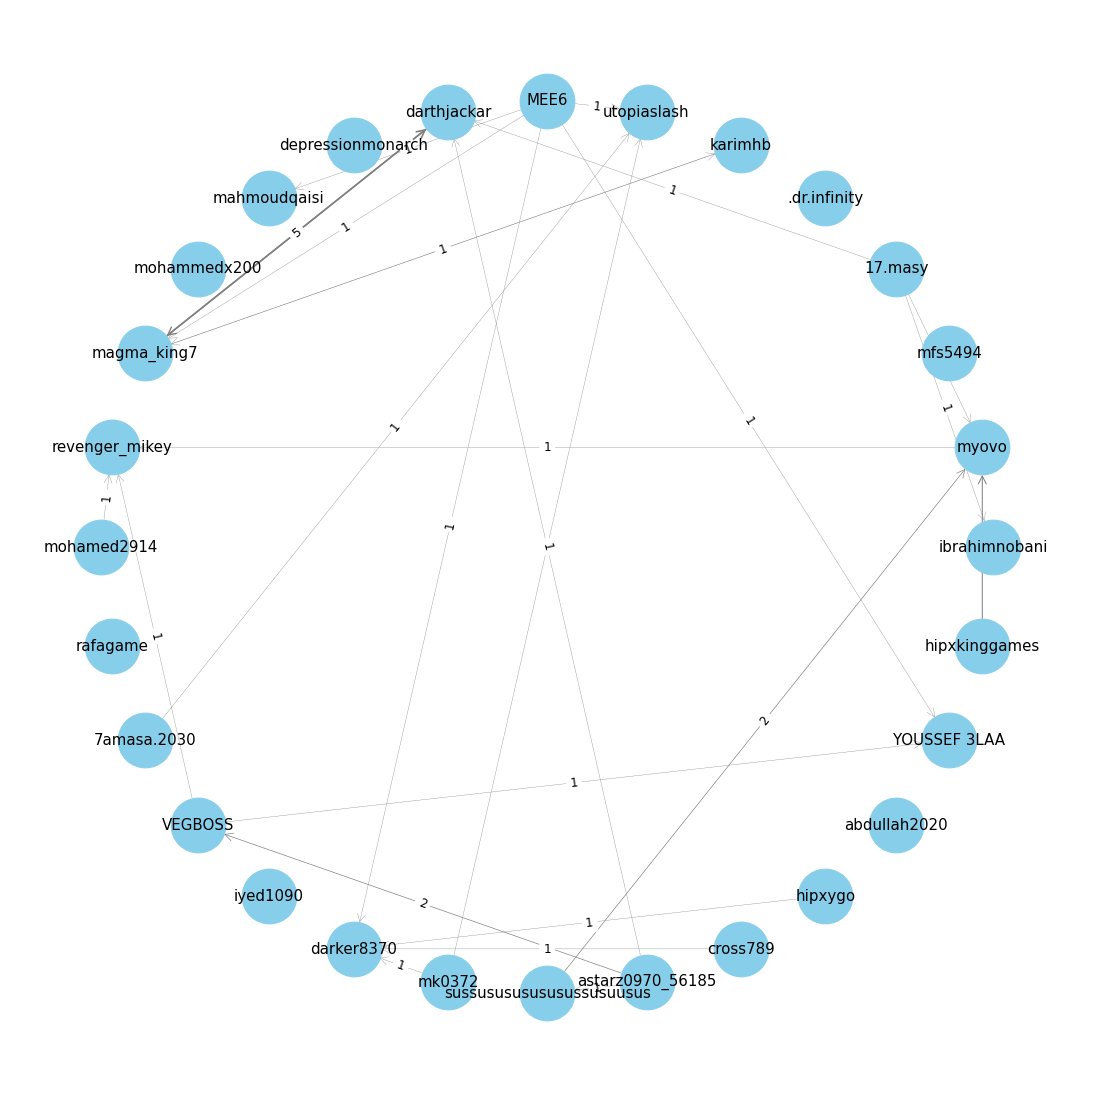

In [26]:
# Initialize a directed graph
G = nx.DiGraph()

# Loop through each message in the dataframe
for index, row in df.iterrows():
    author = row['author']['nickname']
    
    if not G.has_node(author) and author is not None:
        G.add_node(author)
    
    mentions = row.get('mentions', [])
    for mention in mentions:
        mentioned_user = mention['nickname']
        
        if not G.has_node(mentioned_user):
            G.add_node(mentioned_user)
        
        if G.has_edge(author, mentioned_user):
            G[author][mentioned_user]['weight'] += 1
        else:
            G.add_edge(author, mentioned_user, weight=1)

plt.figure(figsize=(15, 15))

pos = nx.circular_layout(G)
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=15,
        width=[(d['weight'] / 3) for _, _, d in edges],
        arrowstyle="->", arrowsize=20, edge_color="gray")


labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox


ax = plt.gca()
for user_name, image in avatar_images.items():
    x, y = pos[user_name]
    imgbox = OffsetImage(image, zoom=1.3)  # Adjust zoom as needed
    ab = AnnotationBbox(imgbox, (x, y), frameon=False, pad=0)
    ax.add_artist(ab)

plt.show()
